In [37]:
import os
import numpy as np
import xarray as xr
from datetime import datetime as dt
from pathlib import Path
import iris
import iris.coord_categorisation
from iris.experimental.equalise_cubes import equalise_attributes
from iris.util import unify_time_units
import matplotlib.pyplot as plt

In [76]:
path = '/gws/pw/j05/cop26_hackathons/bristol/project02/data/CMIP6proj/'
#path = '/home/users/jcabaker/bristol_cmip6_hack/save_files/'
pr_anom_dict = np.load(path+ 'cmip6_ssp585_pr_anomalies.npy').item()
tas_anom_dict = np.load(path+ 'cmip6_ssp585_global_tas_anomalies.npy').item()

for key in tas_anom_dict.keys():
    print(key)

ACCESS-CM2
ACCESS-ESM1-5
BCC-CSM2-MR
CAMS-CSM1-0
CanESM5
CNRM-CM6-1
CNRM-ESM2-1
FGOALS-f3-L
FGOALS-g3
HadGEM3-GC31-MM
GISS-E2-1-G
INM-CM5-0
INM-CM4-8
MPI-ESM1-2-LR
NorESM2-LM
NorESM2-MM
TaiESM1
UKESM1-0-LL


In [ ]:
assert False
def fix_lats_lons(cube):
    cube2 = cube.copy()
    cube2.coord('lon').rename('longitude')
    cube2.coord('longitude').units = 'degrees_east'
    cube2.coord('longitude').guess_bounds()
    cube2.coord('latitude').guess_bounds()
    return(cube2)

scaled_pr_lat_lon_mean = {}
scaled_pr_lon_mean = {}
tas_means = {}
coords = ('longitude', 'latitude')
for key in pr_anom_dict.keys():
    print(key)
    
    # Fix lat and lon coordinates and calculate weights for tas cube
    tas_cube = fix_lats_lons(tas_anom_dict[key])
    weights = iris.analysis.cartography.area_weights(tas_cube, normalize=False)
    
    # Global mean temperature anomaly
    tas_mean = tas_cube.collapsed(coords,iris.analysis.MEAN, weights=weights)

    # Fix lat and lon coordinates, convert units and calculate weights for pr cube
    pr_cube = fix_lats_lons(pr_anom_dict[key])
    pr_cube.convert_units('kg m-2 day-1')
    pr_scaled = pr_cube/tas_mean.data
    weights = iris.analysis.cartography.area_weights(pr_scaled, normalize=False)
    
    # Mean over lats and lons (needs weighting)
    pr_mean = pr_scaled.collapsed(coords,iris.analysis.MEAN, weights=weights)
    # Mean over lons only
    pr_lon_mean = pr_scaled.collapsed('longitude', iris.analysis.MEAN)    
    
    scaled_pr_lat_lon_mean[key] = pr_mean.data
    scaled_pr_lon_mean[key] = pr_lon_mean
    tas_means[key] = tas_mean.data
    #assert False

# save data
outpath = '/home/users/jcabaker/bristol_cmip6_hack/save_files/'
fname = 'scaled_precip_anomalies.npy'
np.save(outpath + fname, scaled_pr_lat_lon_mean)

fname = 'scaled_precip_anomalies_by_lats.npy'
np.save(outpath + fname, scaled_pr_lon_mean)

fname = 'global_mean_T_anomalies.npy'
np.save(outpath + fname, tas_means)
#assert False

In [96]:
# load data
path = '/home/users/jcabaker/bristol_cmip6_hack/save_files/'
fname = 'scaled_precip_anomalies.npy'
scaled_pr_lat_lon_mean = np.load(outpath + fname).item()

fname = 'scaled_precip_anomalies_by_lats.npy'
scaled_pr_lon_mean = np.load(outpath + fname).item()

fname = 'global_mean_T_anomalies.npy'
tas_means = np.load(outpath + fname).item()
#assert False

In [97]:
for key in tas_means:
    val = tas_means[key]
    print(key, val)
assert False

ACCESS-CM2 4.797952173026986
ACCESS-ESM1-5 4.159578256025929
BCC-CSM2-MR 3.4890282672879502
CAMS-CSM1-0 2.516905221896541
CanESM5 5.8715075830581265
CNRM-CM6-1 4.625540666179112
CNRM-ESM2-1 4.251514616885245
FGOALS-f3-L 3.70190320540454
FGOALS-g3 3.0307792575076307
HadGEM3-GC31-MM 5.398875751864516
GISS-E2-1-G 3.3956351955972215
INM-CM5-0 3.002966250938668
INM-CM4-8 3.1034709051306737
MPI-ESM1-2-LR 3.195598580855069
NorESM2-LM 3.293102166758379
NorESM2-MM 3.3162387753060436
TaiESM1 5.343779944297536
UKESM1-0-LL 5.991787809890392


AssertionError: 

In [98]:
# Sort models by P anomaly over analysis area (2070-2099 minus 1970-1999)
sorted_list = dict(sorted(scaled_pr_lat_lon_mean.items(), key=lambda item: item[1]))
print(sorted_list)

# Get colours according to whether P anomaly is positive or negative
col1 = 'peachpuff'
col2 = 'lightsteelblue'
cols = []
model_cols = {}
for key in sorted_list:
    val = sorted_list[key]
    if val < 0:
        cols.append(col1)
        model_cols[key] = col1
    if val > 0:
        cols.append(col2)
        model_cols[key] = col2

{'GISS-E2-1-G': array(-0.02006355), 'NorESM2-MM': array(-0.00169634), 'NorESM2-LM': array(0.01159056), 'CNRM-ESM2-1': array(0.01372784), 'CNRM-CM6-1': array(0.01725769), 'ACCESS-ESM1-5': array(0.06117832), 'UKESM1-0-LL': array(0.06333448), 'TaiESM1': array(0.0790463), 'FGOALS-f3-L': array(0.08156103), 'FGOALS-g3': array(0.08202971), 'HadGEM3-GC31-MM': array(0.08444159), 'CanESM5': array(0.08613308), 'ACCESS-CM2': array(0.10100022), 'CAMS-CSM1-0': array(0.12999591), 'MPI-ESM1-2-LR': array(0.14747671), 'BCC-CSM2-MR': array(0.15296455), 'INM-CM5-0': array(0.17295145), 'INM-CM4-8': array(0.18679376)}


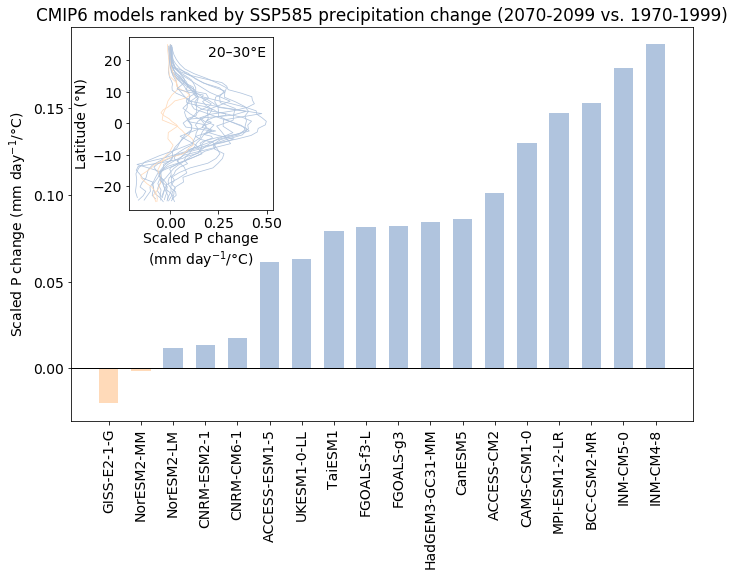

In [111]:
s = 14
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : s}

plt.rc('font', **font)
width = 0.6
ind = ind = np.arange(len(sorted_list))

names = list(sorted_list.keys())
values = list(sorted_list.values())


# Plot data in barplot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

ax.axhline(y=0, linewidth=1, color='k')
ax.bar(ind, values, width, color=cols, tick_label=names)
#ax.set_ylim(0, 2900)
#ax.set_xlim(-1, 38)
#ax.set_xlim(-0.5, 3.5)

#plt.legend(lines, keys, frameon=False, loc=2, ncol=4)
plt.xticks(rotation='vertical')
ax.set_ylabel('Scaled P change (mm day$^{-1}$/°C)', fontsize=s)
#ax.set_title('Annual P (mm)', fontsize=s)

ax2 = fig.add_axes([0.19, 0.65, 0.2, 0.3])
for model in scaled_pr_lon_mean.keys():
    xvals = scaled_pr_lon_mean[model]
    
    # get lats from anomaly cube
    yvals = pr_anom_dict[model].coord('latitude').points
    ax2.plot(xvals, yvals, lw=0.75, color=model_cols[model])
    
ax2.set_xlabel('Scaled P change\n(mm day$^{-1}$/°C)')
ax2.set_ylabel('Latitude (°N)')
ax2.annotate('20–30°E', xy=(0.95, 0.95), xycoords='axes fraction', horizontalalignment='right', verticalalignment='top')
plt.tight_layout()
ax.set_title('CMIP6 models ranked by SSP585 precipitation change (2070-2099 vs. 1970-1999)')
#assert False
path = '//home/users/jcabaker/bristol_cmip6_hack/save_files/'
fname = 'cmip6_ssp585_future_precip_change_scaled_by_global_mean_T.png'
plt.savefig(path+fname, dpi=300, bbox_inches='tight')